<a href="https://colab.research.google.com/github/LlakmalGamage/CNN-SinhalaCharRecognition-Deep-Learning-Mini-Project-01/blob/main/Sinhala_Character_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
import cv2
import tensorflow as tf

Connect the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
!ls /content/drive/

Mounted at /content/drive
MyDrive


In [ ]:
train_dataset= '/content/drive/MyDrive/deep_learning_dataset/Training'

testing_dataset= '/content/drive/MyDrive/deep_learning_dataset/Testing'

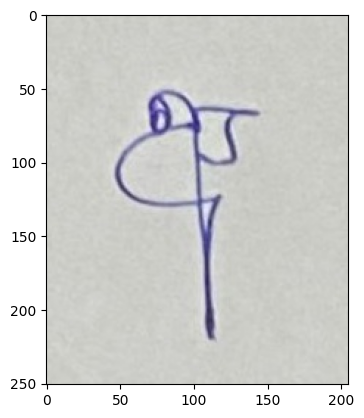

In [ ]:

image_path = '/content/drive/MyDrive/deep_learning_dataset/Training/A/A_46.jpg'

# Check if the file exists
if not os.path.isfile(image_path):
    print(f"Error: The file '{image_path}' does not exist.")
else:
    # Read the image using cv2
    image = cv2.imread(image_path)

    # Display the image using matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.show()

Found 80 images belonging to 2 classes.
Classes found in the dataset:
A
J


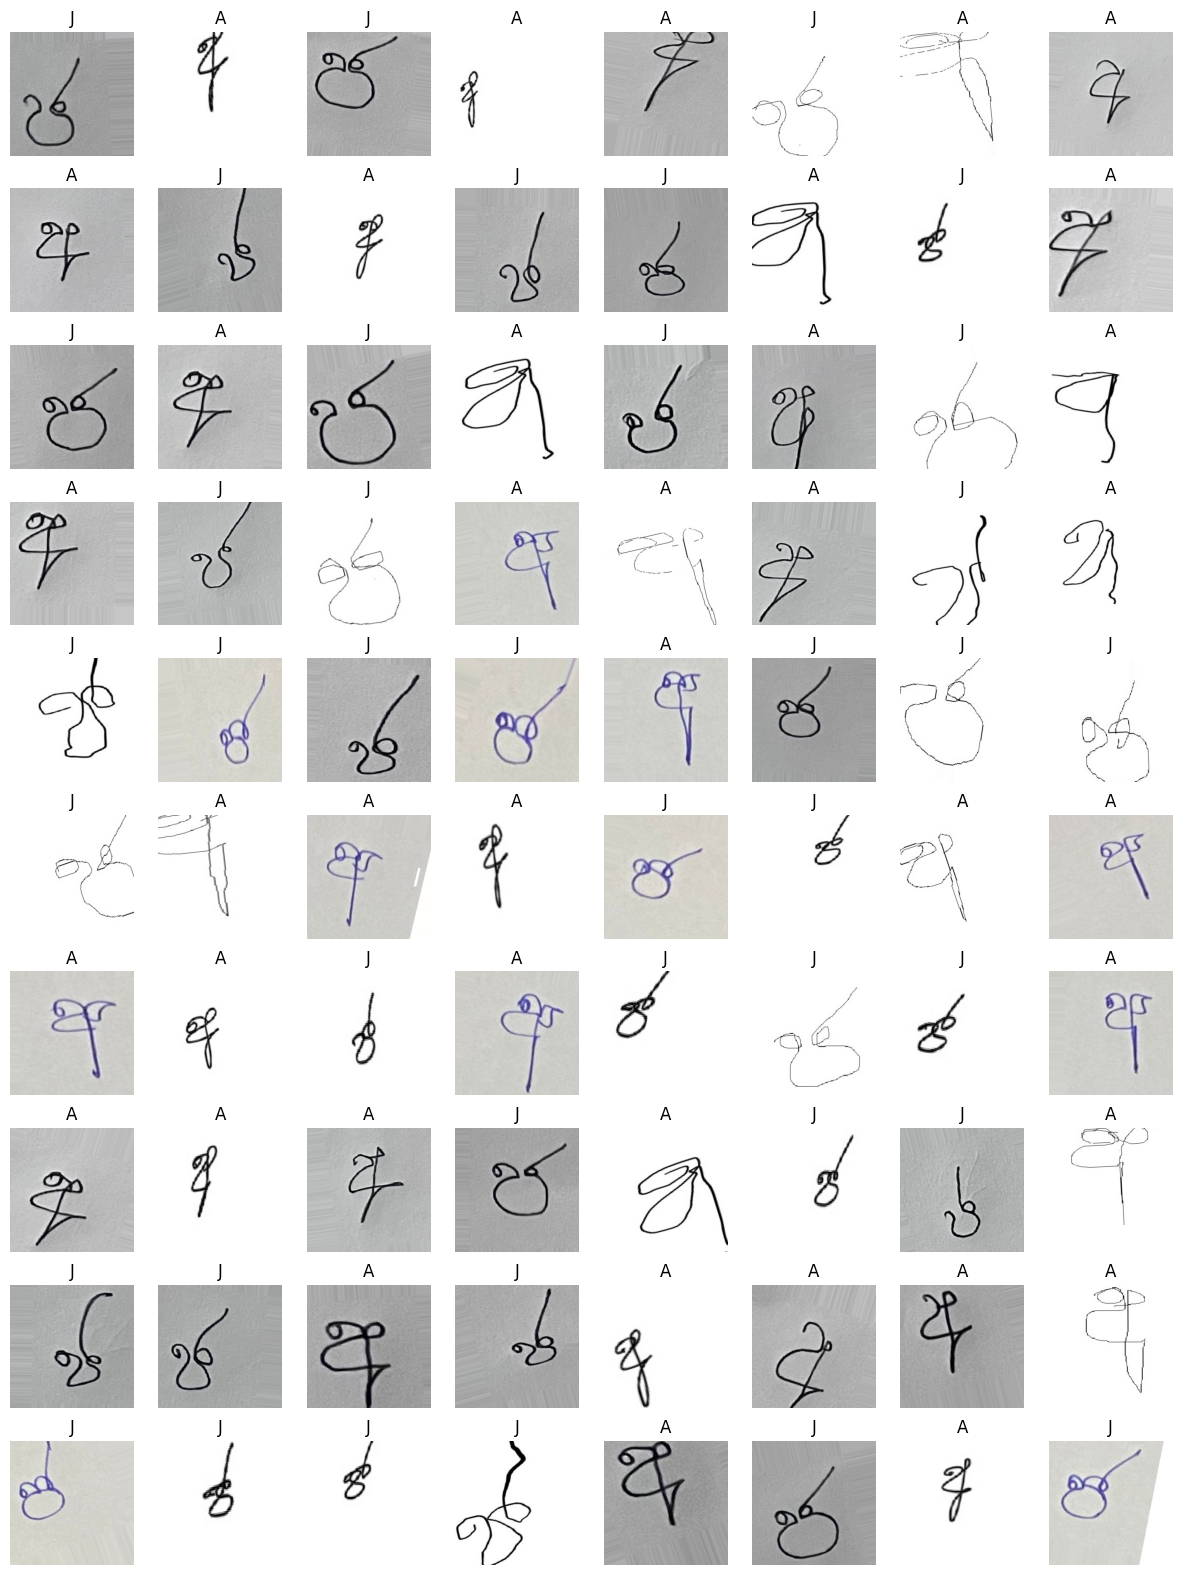

In [ ]:


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)


train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/deep_learning_dataset/Training',
    target_size=(300, 300),
    batch_size=64,
    class_mode='binary',



)

class_names = list(train_generator.class_indices.keys())

# Printing class names
print("Classes found in the dataset:")
for class_name in class_names:
    print(class_name)



import matplotlib.pyplot as plt

# Set the number of images to display
num_images = 80

# Extract all images and labels from the generator
all_images = []
all_labels = []

for _ in range(num_images // 64 + 1):
    batch = train_generator.next()
    images, labels = batch
    all_images.extend(images)
    all_labels.extend(labels)

# Convert one-hot encoded labels to integers
class_labels = [int(label) for label in all_labels]

# Mapping class labels to actual class names
class_names_list = [class_names[label] for label in class_labels]

# Display all images with labels in a single plot
plt.figure(figsize=(15, 20))
for i in range(num_images):
    plt.subplot(10, 8, i + 1)
    plt.imshow(all_images[i])
    plt.title(class_names_list[i])
    plt.axis('off')

plt.show()

In [ ]:
model = Sequential([
    Conv2D(64, (4, 4), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (4, 4), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10)

Epoch 1/10
2/2 [==============================] - 24s 18s/step - loss: 0.6323 - accuracy: 0.6750
Epoch 2/10
2/2 [==============================] - 23s 17s/step - loss: 0.6554 - accuracy: 0.5875
Epoch 3/10
2/2 [==============================] - 26s 17s/step - loss: 0.6403 - accuracy: 0.6000
Epoch 4/10
2/2 [==============================] - 25s 4s/step - loss: 0.6214 - accuracy: 0.6750
Epoch 5/10
2/2 [==============================] - 25s 4s/step - loss: 0.6599 - accuracy: 0.5375
Epoch 6/10
2/2 [==============================] - 25s 4s/step - loss: 0.6182 - accuracy: 0.6625
Epoch 7/10
2/2 [==============================] - 25s 4s/step - loss: 0.6610 - accuracy: 0.5875
Epoch 8/10
2/2 [==============================] - 24s 17s/step - loss: 0.6620 - accuracy: 0.6000
Epoch 9/10
2/2 [==============================] - 24s 19s/step - loss: 0.6573 - accuracy: 0.6375
Epoch 10/10
2/2 [==============================] - 26s 19s/step - loss: 0.6354 - accuracy: 0.6750


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/deep_learning_dataset/Testing',
    target_size=(300, 300),
    batch_size=64,
    class_mode='binary',
    shuffle=False)

Found 20 images belonging to 2 classes.


In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

1/1 [==============================] - 1s 1s/step - loss: 0.5448 - accuracy: 0.9500
Test Loss: 0.5447937846183777
Test Accuracy: 0.949999988079071
